# Regression Analysis

*In our first live tutorial we got to know as a first example the prediction of successfull loans. This was an example of a **classification problem**, where the target variable is binary (successfull vs. non-successfull loans). It can be solved via a logistic regression, which predicts the probability that a loan will be successfull or not.* 

Now we turn to **regression problems**, where the target variable is continuous, like predicting the delay of flights or the house price.

*We start with discussing the most important regression algorithms and afterwards explain how the algorithms are used in forecasting problems.*

# Preamble

In [1]:
# Common imports
import numpy as np # numpy is THE toolbox for scientific computing with python
import pandas as pd # pandas provides THE data structure and data analysis tools for data scientists 

# maximum number of columns
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from warnings import filterwarnings
filterwarnings('ignore')

# Using a scikit-learn dataset: the Boston housing data

In scikit-learn you find some toy datasets. Here we use the **boston housing data** from scikit-learn. 

To get to know the dataset you can take a look at: https://scikit-learn.org/stable/datasets/index.html#boston-dataset. 

In [2]:
from sklearn import datasets

# Load dataset and bring it into dataframe shape
df_boston         = pd.DataFrame(datasets.load_boston().data)
df_boston.columns = datasets.load_boston().feature_names
y_boston          = datasets.load_boston().target

# bring target variable into dataframe
df_boston.insert(0, "Price", y_boston, True) 

In [3]:
df_boston.head(3)

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [4]:
#You can find the description of the dataset via the command:
print(datasets.load_boston().DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# Take a first look at the data:
df_boston.tail(3)

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
503,23.9,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,22.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,11.9,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


# Understand and Visualize the data

The ```lmplot()``` function from the **seaborn** toolbox (https://seaborn.pydata.org/) is intended for exploring linear relationships. Let us try it out. 

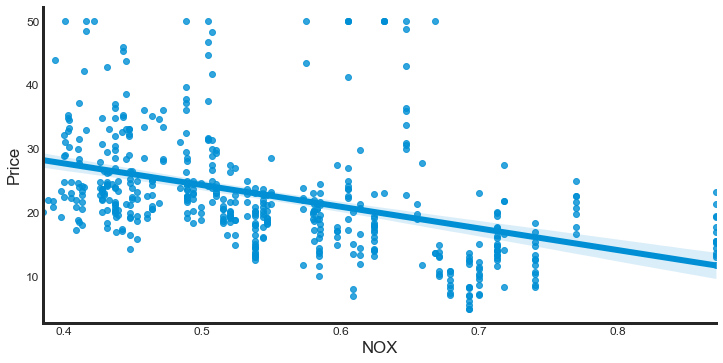

In [6]:
import seaborn as sns

fig = plt.style.use('fivethirtyeight')
sns.set_style('ticks')
sns.lmplot(x = 'NOX', y = 'Price', data = df_boston, height = 5, aspect = 2)

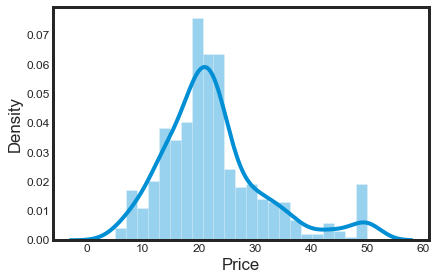

In [7]:
ax = sns.distplot(df_boston.Price)

Find out more about seaborn plots, which can be very informative!

**Start to think of creating a toolbox of how to visually understand data relations. This should be built on your preferences! On an informative plot there should be everything visible which helps you to understand the data relation.**

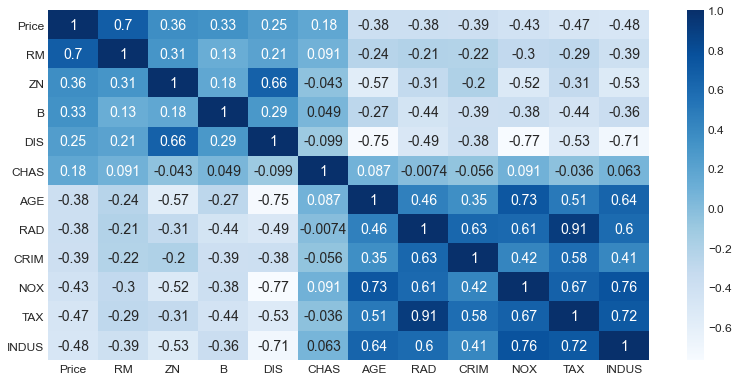

In [8]:
import seaborn as sns 
k = 12 #number of variables for heatmap
cols = df_boston.corr().nlargest(k, 'Price')['Price'].index
cm = df_boston[cols].corr()
plt.figure(figsize=(12,6))
sns.heatmap(cm, annot=True, cmap = 'Blues')
plt.show()

**This section about data exploration should be much longer, with correlation analysis, histograms and statistical analysis - before ML is applied!**

# Different Regression Algorithms

In [9]:
# Let us start with splitting the data into design matrix and target variable. 

# matrix with all features (design matrix)
X = df_boston.drop('Price', axis = 1)

# target
y = df_boston['Price']

In [37]:
df_boston.shape

(506, 14)

## Linear Regression

We want to find the model $\hat{y} = \mathbf{\omega}^T \cdot \mathbf{x}$ so that
the sum of the squared errors is minimal:
    
\begin{equation}
J(\omega) = \frac{1}{2N} \sum_{i=1}^{N} \left( y_i - \hat{y}_i \right)^2
\end{equation}

If our model just has a single feature $x$ we have $\hat{y}(x_i) = \omega_0 + \omega_1 \cdot x$ and 

\begin{equation}
J(\omega) = \frac{1}{2N} \sum_{i=1}^{N} \left( y_i - \left[ \omega_0 + \omega_1 \cdot x \right] \right)^2
\end{equation}

Here $\omega_0$ is called the bias term. 

The cost function is a **sum of squared errors**, more precisely the **mean squared error or MSE**. With $\epsilon_i = (y_i-\hat{y}_i)$ the model's resiudals it can be written as
\begin{equation}
J(\omega) = MSE(\omega) \; . 
\end{equation}

The cost function $J(\omega) = J(\omega_0, \omega_1)$ defines a surface in the $(\omega_0, \omega_1)$ space. It is a *convex* function and has exactly one minimum. It can be obtained with **Gradient Descent**. 

Linear regression is closely connected to **Gaussian distributions**. In fact, linear regression assumes that

\begin{equation}
p(y|\mathbf{x}, \mathbf{\omega}) = \mathcal{N}(y|\mathbf{x}, \mathbf{\omega}, \sigma^2)
\end{equation}
with $\mathcal{N}(\mu, \sigma^2)$ a Gaussian distribution. If we insert such a Gaussian distribution into the **maximum likelihood estimation** we arrive at the residual sum of squares. 

*Note: One can implement linear regression in Python by using the package __statsmodels__ as well. Typically, this is desirable when there is a need for more detailed results. Here we use the sklearn implementation.*

In [10]:
from sklearn.linear_model import LinearRegression
np.set_printoptions(suppress=True)
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X, y)

print('INTERCEPT: ', lin_reg.intercept_)
print('COEFFS:    ', lin_reg.coef_.round(5))
print()
print('R2 score:  ', lin_reg.score(X, y))
print('RMSE    :  ', np.sqrt(mean_squared_error(lin_reg.predict(X), y)))

INTERCEPT:  36.45948838509015
COEFFS:     [ -0.10801   0.04642   0.02056   2.68673 -17.76661   3.80987   0.00069
  -1.47557   0.30605  -0.01233  -0.95275   0.00931  -0.52476]

R2 score:   0.7406426641094094
RMSE    :   4.679191295697282


Linear regression formula $\hat{y} = \mathbf{\omega}^T \cdot \mathbf{x}$:

In [11]:
str(lin_reg.intercept_.round(2)) + ' + ' + str([str(lin_reg.coef_[i].round(2)) + ' x ' + X.columns[i] + ' + ' for i in range(X.shape[1])]).replace(',', '').replace('\'', '').replace('[','').replace(']','')

'36.46 + -0.11 x CRIM +  0.05 x ZN +  0.02 x INDUS +  2.69 x CHAS +  -17.77 x NOX +  3.81 x RM +  0.0 x AGE +  -1.48 x DIS +  0.31 x RAD +  -0.01 x TAX +  -0.95 x PTRATIO +  0.01 x B +  -0.52 x LSTAT + '

## Explanation of the metrics

### R^2 score - the coefficient of determination 

It represents the proportion of variance of the target variable $y$ that has been explained by the independent variables - the features - in the model. It provides an indication of goodness of fit and therefore a measure of how well unseen samples are likely to be predicted by the model, through the proportion of explained variance.

As such variance is dataset dependent, R² may not be meaningfully comparable across different datasets. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R² score of 0.0.

$$ R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y}_i)^2} $$


### Mean Squared Error - Root Mean Squared Error
It is the expected value of the squared error

$$ MSE = \frac{1}{n} \sum_{i=0}^{n-1} (y_i - \hat{y}_i)^2 $$

Because it weights each term quadratically, outliers have a huge effect. 

The advantage of the **root mean square error (RMSE)** is that its magnitude is interpretable on the same
scale as the original values, just as standard deviation is a more interpretable
quantity than variance.

### Mean Absolute Error (MAE)

It is the expected value of the absolute error:
    
$$ MAE = \frac{1}{n} \sum_{i=0}^{n-1} |y_i - \hat{y}_i| $$

In [12]:
from sklearn.metrics import mean_absolute_error
print('MAE    :  ', mean_absolute_error(lin_reg.predict(X), y))

MAE    :   3.270862810900317


### Confidence Intervals and Error Distribution

Gaussian 90 Percentile interval: how big are the errors for 90% of the cases 

In [13]:
y_pred = lin_reg.predict(X)
diff   = y-y_pred
ci90   = 1.645*np.sqrt(1/(len(diff)-2)*np.sum((diff)**2)) 
print(ci90)

7.712526920737227


## Regularized Linear Models

Regularization in regression models means that we are constraining the weights of the model. In sklearn's linear model toolbox regularization is denoted as $\alpha$. For **Ridge Regression** we add 

\begin{equation}
\frac{1}{2} \alpha \sum_{i=1}^m \omega_i^2 = \frac{1}{2} \alpha ||\omega||^2_2 \; . 
\end{equation}

This forces the model coefficient weights to be as small as possible. **Lasso Regression** (*Least Absolute Shrinkage*) uses the L1-norm instead:

\begin{equation}
\alpha \sum_{i=1}^m \omega_i = \alpha ||\omega||_1 \; . 
\end{equation}

It tends to completely eliminate the weights of the least important features. **Elastic Net** is a middle ground between Ridge Regression and Lasso Regression:

\begin{equation}
r \cdot \alpha \sum_{i=1}^m \omega_i + \frac{1-r}{2} \alpha \sum_{i=1}^m \omega_i^2  \; . 
\end{equation}

In [38]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, random_state = 42)
ridge_reg.fit(X,y)
print('INTERCEPT: ', ridge_reg.intercept_)
print('COEFFS: ', ridge_reg.coef_.round(5))
print()
print('R2 score: ', ridge_reg.score(X, y))
print('RMSE    : ', np.sqrt(mean_squared_error(ridge_reg.predict(X), y)))
print()
print(str(ridge_reg.intercept_.round(2)) + ' + ' + str([str(ridge_reg.coef_[i].round(2)) + ' x ' + X.columns[i] + ' + ' for i in range(X.shape[1])]).replace(',', '').replace('\'', '').replace('[','').replace(']',''))

INTERCEPT:  31.597669818274113
COEFFS:  [-1.046000e-01  4.744000e-02 -8.800000e-03  2.552390e+00 -1.077701e+01
  3.854000e+00 -5.410000e-03 -1.372650e+00  2.901400e-01 -1.291000e-02
 -8.760700e-01  9.670000e-03 -5.333400e-01]

R2 score:  0.7388703133867616
RMSE    :  4.695151993608747

31.6 + -0.1 x CRIM +  0.05 x ZN +  -0.01 x INDUS +  2.55 x CHAS +  -10.78 x NOX +  3.85 x RM +  -0.01 x AGE +  -1.37 x DIS +  0.29 x RAD +  -0.01 x TAX +  -0.88 x PTRATIO +  0.01 x B +  -0.53 x LSTAT + 


In [39]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 10, random_state = 42)
lasso_reg.fit(X, y)
print('INTERCEPT: ', lasso_reg.intercept_)
print('COEFFS: ', lasso_reg.coef_.round(5))
print()
print('R2 score: ', lasso_reg.score(X, y))
print('RMSE    : ', np.sqrt(mean_squared_error(lasso_reg.predict(X), y)))

print()
print(str(lasso_reg.intercept_.round(2)) + ' + ' + str([str(lasso_reg.coef_[i].round(2)) + ' x ' + X.columns[i] + ' + ' for i in range(X.shape[1])]).replace(',', '').replace('\'', '').replace('[','').replace(']',''))

INTERCEPT:  30.488358689544746
COEFFS:  [-0.       0.02615 -0.       0.       0.       0.       0.      -0.
  0.      -0.00928 -0.       0.0075  -0.56404]

R2 score:  0.5233631451699069
RMSE    :  6.343301327575979

30.49 + -0.0 x CRIM +  0.03 x ZN +  -0.0 x INDUS +  0.0 x CHAS +  0.0 x NOX +  0.0 x RM +  0.0 x AGE +  -0.0 x DIS +  0.0 x RAD +  -0.01 x TAX +  -0.0 x PTRATIO +  0.01 x B +  -0.56 x LSTAT + 


In [40]:
from sklearn.linear_model import ElasticNet

# Here we have two parameters: **alpha** and **l1_ratio (lasso regularization)**.
model = ElasticNet(alpha = 1, l1_ratio=0.5, random_state = 42)
model.fit(X, y)
print('INTERCEPT: ', model.intercept_)
print('COEFFS: ', model.coef_.round(5))
print()
print('R2 score: ', model.score(X, y))
print('RMSE    : ', np.sqrt(mean_squared_error(model.predict(X), y)))

print()
print(str(model.intercept_.round(2)) + ' + ' + str([str(model.coef_[i].round(2)) + ' x ' + X.columns[i] + ' + ' for i in range(X.shape[1])]).replace(',', '').replace('\'', '').replace('[','').replace(']',''))

INTERCEPT:  42.22956397215435
COEFFS:  [-0.08037  0.05324 -0.01266  0.      -0.       0.93394  0.02058 -0.76204
  0.30157 -0.01644 -0.74805  0.00834 -0.75843]

R2 score:  0.6861018474345026
RMSE    :  5.147731803213881

42.23 + -0.08 x CRIM +  0.05 x ZN +  -0.01 x INDUS +  0.0 x CHAS +  -0.0 x NOX +  0.93 x RM +  0.02 x AGE +  -0.76 x DIS +  0.3 x RAD +  -0.02 x TAX +  -0.75 x PTRATIO +  0.01 x B +  -0.76 x LSTAT + 


## Huber Regressor

Linear regression model that is robust to outliers: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html



In [17]:
def print_model_results(our_estimator):
    
    model = our_estimator #(random_state = 42)
    model.fit(X, y)
    print('INTERCEPT: ', model.intercept_)
    print('COEFFS: ', model.coef_.round(5))
    print()
    print('R2 score: ', model.score(X, y))
    print('RMSE    : ', np.sqrt(mean_squared_error(model.predict(X), y)))

    print()
    print(str(model.intercept_.round(2)) + ' + ' + str([str(model.coef_[i].round(2)) + ' x ' + X.columns[i] + ' + ' for i in range(X.shape[1])]).replace(',', '').replace('\'', '').replace('[','').replace(']',''))

In [18]:
from sklearn.linear_model import HuberRegressor
print_model_results(our_estimator=HuberRegressor())

INTERCEPT:  0.40901353545110347
COEFFS:  [-0.17042  0.06905 -0.01635  0.37243  0.20616  3.83241 -0.00501 -0.4249
  0.3408  -0.02097  0.20853  0.01494 -0.38356]

R2 score:  0.6334996597323772
RMSE    :  5.562355261620419

0.41 + -0.17 x CRIM +  0.07 x ZN +  -0.02 x INDUS +  0.37 x CHAS +  0.21 x NOX +  3.83 x RM +  -0.01 x AGE +  -0.42 x DIS +  0.34 x RAD +  -0.02 x TAX +  0.21 x PTRATIO +  0.01 x B +  -0.38 x LSTAT + 


# Polynomial Regression

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
x -> x**2, x_1 x_2 -> x_1 *x_2, 

In [20]:
X_poly[0]

array([     0.00632   ,     18.        ,      2.31      ,      0.        ,
            0.538     ,      6.575     ,     65.2       ,      4.09      ,
            1.        ,    296.        ,     15.3       ,    396.9       ,
            4.98      ,      0.00003994,      0.11376   ,      0.0145992 ,
            0.        ,      0.00340016,      0.041554  ,      0.412064  ,
            0.0258488 ,      0.00632   ,      1.87072   ,      0.096696  ,
            2.508408  ,      0.0314736 ,    324.        ,     41.58      ,
            0.        ,      9.684     ,    118.35      ,   1173.6       ,
           73.62      ,     18.        ,   5328.        ,    275.4       ,
         7144.2       ,     89.64      ,      5.3361    ,      0.        ,
            1.24278   ,     15.18825   ,    150.612     ,      9.4479    ,
            2.31      ,    683.76      ,     35.343     ,    916.839     ,
           11.5038    ,      0.        ,      0.        ,      0.        ,
            0.        ,  

To understand how polynomial and interaction features are build, look at:https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html.

*If an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].*

In [21]:
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)
print('INTERCEPT: ', poly_reg.intercept_)
print('COEFFS: ', poly_reg.coef_.round(5))
print()
print('R2 score: ', poly_reg.score(X_poly, y))
print('RMSE    : ', np.sqrt(mean_squared_error(poly_reg.predict(X_poly), y)))

INTERCEPT:  -175.2819410202895
COEFFS:  [ -4.55224   0.20671  -4.64521  29.71333 133.8581   21.68643   0.90782
  -7.48279   1.95079   0.02168   6.44279   0.09437   0.7237    0.00158
   0.21701   0.39456   2.49036  -0.72058   0.13741  -0.0031   -0.09574
   0.21464  -0.02406   0.38471  -0.00033   0.02079  -0.00048  -0.00521
  -0.06252  -1.04603   0.01364   0.00007  -0.01029  -0.00501   0.00063
  -0.00699   0.00065  -0.0045    0.03956   0.00117   1.19294   0.29674
   0.00346   0.13322  -0.02323   0.00057  -0.01325   0.00245  -0.01136
  29.71333 -34.06795  -5.51985   0.01338   1.11447  -0.0711    0.00454
  -0.9374    0.01937  -0.23762 -36.10357   1.74333  -0.45312  14.33791
  -1.88475   0.17737 -10.95217  -0.0207    1.13599   0.36884  -0.05875
   0.06123  -0.05193  -0.01904  -0.54218  -0.00384  -0.19107   0.00016
  -0.00439   0.01566  -0.00055   0.00008  -0.00064  -0.00745   0.43162
  -0.10474  -0.00486  -0.16162  -0.00327   0.08044  -0.12597   0.0076
  -0.08247   0.00025  -0.03064  -0.000

**The polynomial regression has the best score. It is nearly perfect. Also RMSE is nearly perfect. But is it then also perfectly usable for forecasting?**

# Bias-Variance Tradeoff

bias: assumption you impose on the model -> linear
      make the weights very small (alpha -> 100, 1000...)
        
$\epsilon_{train} = 6.4$

$\epsilon_{test} = 6.4$

variance: free is the model to choose parameter, polynomial degree = 100

$\epsilon_{train} = 1.2 $

$\epsilon_{test} = 10.4$

overfitting!

how to choose the best value of the regularisation alpha?

to be implemented

# From Fitting to Forecasting

## Train-Test Split

Forecasting: Split your dataset! Making a kind "future data set"

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

## GridSearch: Best Regularization Parameter

the optimal parameter is here the optimal alpha value (= regularization strength)

0 (no regulariation) - inf (only regularization)

*__GridSearchCV is used to find the optimal parameters__ to train your final model. 

It works as follows:

*     Run GridSearchCV for a huge parameter set
*     Get the parameters that have the best score. 
*     Train with these parameters with all training data. It is important to note that if you have trained your final model on all of your data, you cannot test it. 
*    For any correct test, you must must reserve some of the data (X_test, y_test).

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
# find the names of the hyperparameters:
Lasso().get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [25]:
# define the values for alpha:
#alphas = [0.00001, 1, 2, 3]
alphas = np.logspace(-10,10,10)
np.set_printoptions(suppress=False)
alphas

array([1.00000000e-10, 1.66810054e-08, 2.78255940e-06, 4.64158883e-04,
       7.74263683e-02, 1.29154967e+01, 2.15443469e+03, 3.59381366e+05,
       5.99484250e+07, 1.00000000e+10])

In [26]:
# GridSearch CV procedure:
#1 . define your parameters
param_grid = {'alpha' : np.logspace(-10,10,100),
              'max_iter' : [1000]}

model      = Lasso(random_state = 42)
model_cv   = GridSearchCV(estimator  = model, 
                    param_grid = [param_grid],
                    cv = 5, 
                    scoring='neg_mean_squared_error', 
                    n_jobs = -1, # uses all the cores of your computer ressource
                    verbose = 5)
# 5 runs: run 1: 80/20 
#         run 2: 80/20 (train/validation)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    7.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=42,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'alpha': array([1.00000000e-10, 1.59228279e-10, 2.53536449e-10, 4.03701726e-10,
       6.42807312e-10, 1.0...
       9.32603347e+06, 1.48496826e+07, 2.36448941e+07, 3.76493581e+07,
       5.99484250e+07, 9.54548457e+07, 1.51991108e+08, 2.42012826e+08,
       3.85352859e+08, 6.13590727e+08, 9.77009957e+08, 1.55567614e+09,
       2.47707636e+09, 3.94420606e+09, 6.28029144e+09, 1.00000000e+10]),
                          'max_iter': [1000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=5)

In [27]:
# Data frame of results
pd.DataFrame(model_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.094799,0.016128,0.001400,4.903703e-04,1e-10,1000,"{'alpha': 1e-10, 'max_iter': 1000}",-33.378283,-18.449695,-11.145110,-14.397943,-15.066627,-18.487532,7.798390,59
1,0.092397,0.016824,0.001400,4.867779e-04,1.59228e-10,1000,"{'alpha': 1.592282793341094e-10, 'max_iter': 1...",-33.378283,-18.449695,-11.145110,-14.397943,-15.066627,-18.487532,7.798390,58
2,0.074398,0.007657,0.001001,8.341244e-07,2.53536e-10,1000,"{'alpha': 2.5353644939701164e-10, 'max_iter': ...",-33.378283,-18.449695,-11.145110,-14.397943,-15.066627,-18.487531,7.798389,57
3,0.074203,0.001829,0.001199,4.059439e-04,4.03702e-10,1000,"{'alpha': 4.03701725859655e-10, 'max_iter': 1000}",-33.378283,-18.449694,-11.145110,-14.397943,-15.066627,-18.487531,7.798389,56
4,0.067599,0.005677,0.001600,7.988643e-04,6.42807e-10,1000,"{'alpha': 6.428073117284319e-10, 'max_iter': 1...",-33.378282,-18.449694,-11.145109,-14.397942,-15.066627,-18.487531,7.798389,55
5,0.070201,0.004957,0.001402,4.894890e-04,1.02353e-09,1000,"{'alpha': 1.0235310218990269e-09, 'max_iter': ...",-33.378282,-18.449694,-11.145109,-14.397942,-15.066627,-18.487531,7.798389,54
6,0.074800,0.004831,0.001401,4.889906e-04,1.62975e-09,1000,"{'alpha': 1.6297508346206469e-09, 'max_iter': ...",-33.378281,-18.449693,-11.145108,-14.397941,-15.066628,-18.487530,7.798389,53
7,0.074200,0.010495,0.001202,3.986635e-04,2.59502e-09,1000,"{'alpha': 2.595024211399732e-09, 'max_iter': 1...",-33.378279,-18.449692,-11.145107,-14.397940,-15.066628,-18.487529,7.798389,52
8,0.076805,0.009985,0.000996,7.029751e-06,4.13201e-09,1000,"{'alpha': 4.132012400115335e-09, 'max_iter': 1...",-33.378276,-18.449691,-11.145105,-14.397939,-15.066629,-18.487528,7.798388,51
9,0.081201,0.007309,0.000998,4.305816e-06,6.57933e-09,1000,"{'alpha': 6.579332246575682e-09, 'max_iter': 1...",-33.378271,-18.449688,-11.145102,-14.397936,-15.066631,-18.487526,7.798387,50


In [28]:
# print out the best model:
best_model              = model_cv.best_estimator_
print(best_model)
bestmodelFitTime        = model_cv.cv_results_['mean_fit_time'][model_cv.best_index_]
bestmodelScoreTime      = model_cv.cv_results_['mean_score_time'][model_cv.best_index_]

# fit the model again but now on all training data
best_model.fit(X_train, y_train)

Lasso(alpha=0.49770235643321137, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)


Lasso(alpha=0.49770235643321137, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

### Plot regularization parameters

(1.9952644099943586e-05,
 50118720856.79287,
 -4.367203522861111,
 156.79142479159967)

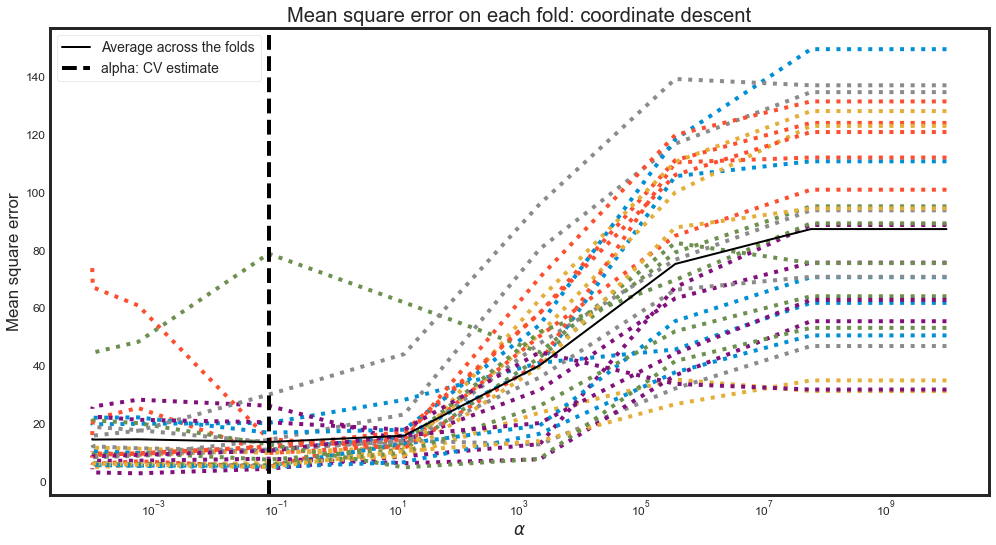

In [29]:
from sklearn.linear_model import LassoCV

model = LassoCV(cv=30, alphas = alphas, random_state=42).fit(X_train, y_train)
model.score(X_train, y_train)

# Display results
# This is to avoid division by zero while doing np.log10
EPSILON = 1e-4

plt.figure(figsize=(15,8))
# ymin, ymax = 2300, 3800
plt.semilogx(model.alphas_ + EPSILON, model.mse_path_, ':')
plt.plot(model.alphas_ + EPSILON, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(model.alpha_ + EPSILON, linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent')
plt.axis('tight')
#plt.ylim(ymin, ymax)

### Plot Lasso coefficients as a function of the regularization parameter

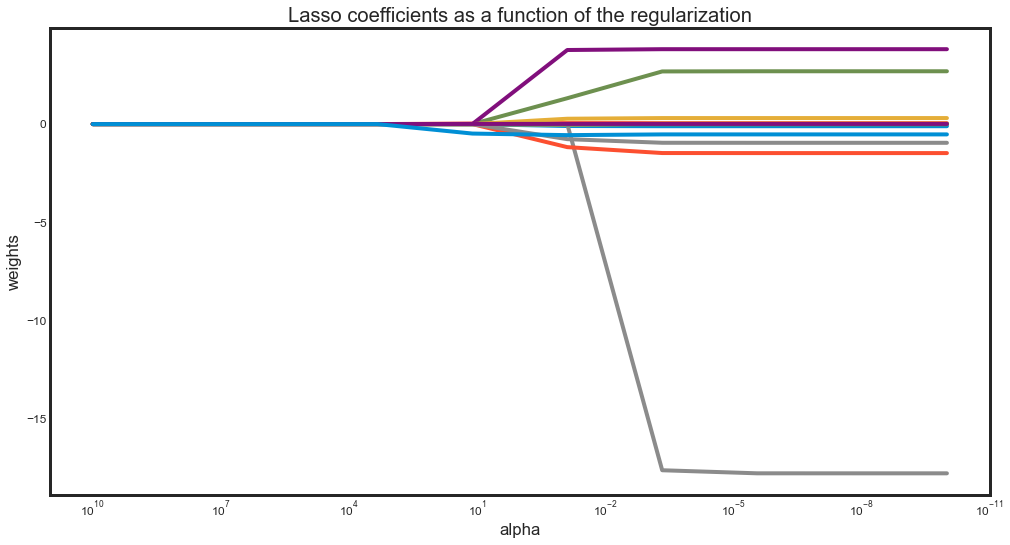

In [30]:
coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=True)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

# #############################################################################
# Display results
plt.figure(figsize=(15,8))
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## Evaluate best linear model for our dataset

In [31]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

models = [Ridge, Lasso, ElasticNet, HuberRegressor]
model_names = ['ridge', 'lasso', 'elasticnet', 'huber']

for x in range(len(models)):
    print(model_names[x])
    
    param_grid = {'alpha' : np.logspace(-10,10,100),
                  'max_iter' : [1000]}
    lin_model  = models[x]() 
    model_cv   = GridSearchCV(estimator  = lin_model, 
                        param_grid = [param_grid],
                        cv = 5,
                        scoring='neg_mean_squared_error', 
                        n_jobs = -1,
                        verbose = 1)
    model_cv.fit(X_train, y_train)

    best_model              = model_cv.best_estimator_
    print(best_model)
    bestmodelFitTime        = model_cv.cv_results_['mean_fit_time'][model_cv.best_index_]
    bestmodelScoreTime      = model_cv.cv_results_['mean_score_time'][model_cv.best_index_]
    best_model.fit(X_train, y_train)
    print('R2 score: ', best_model.score(X_train, y_train))

    
    y_pred = best_model.predict(X_test)
    rmse   = np.sqrt(mean_squared_error(y_pred, y_test))
    print('Test RMSE : ', rmse)
    print("=====================")

ridge
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Ridge(alpha=13848.863713938747, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R2 score:  0.887894819717034
Test RMSE :  3.7315656689252297
lasso
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.3s finished


Lasso(alpha=0.49770235643321137, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2 score:  0.8995594053240821
Test RMSE :  3.5793283879409143
elasticnet
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    3.5s finished


ElasticNet(alpha=0.7924828983539186, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)
R2 score:  0.8990170927446471
Test RMSE :  3.6057385934184873
huber
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   51.4s finished


HuberRegressor(alpha=32.745491628777316, epsilon=1.35, fit_intercept=True,
               max_iter=1000, tol=1e-05, warm_start=False)
R2 score:  0.7189289146123891
Test RMSE :  5.447183951586314


### Evaluate the best model with linear features only

Here we want to understand if just using linear features would give as good results as above with polynomial features:

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [Ridge, Lasso, ElasticNet, HuberRegressor]
model_names = ['ridge', 'lasso', 'elasticnet', 'huber']

for x in range(len(models)):
    print(model_names[x])
    
    param_grid = {'alpha' : np.logspace(-10,10,100),
                  'max_iter' : [1000]}
    lin_model  = models[x]()
    model_cv   = GridSearchCV(estimator  = lin_model, 
                        param_grid = [param_grid],
                        cv = 5,
                        scoring='neg_mean_squared_error', 
                        n_jobs = -1,
                        verbose = 1)
    model_cv.fit(X_train, y_train)

    best_model              = model_cv.best_estimator_
    print(best_model)
    bestmodelFitTime        = model_cv.cv_results_['mean_fit_time'][model_cv.best_index_]
    bestmodelScoreTime      = model_cv.cv_results_['mean_score_time'][model_cv.best_index_]
    best_model.fit(X_train, y_train)
    print('R2 score: ', best_model.score(X_train, y_train))

    
    y_pred = best_model.predict(X_test)
    rmse   = mean_squared_error(y_pred, y_test)
    print('Test RMSE : ', rmse)
    print("=====================")

ridge
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Ridge(alpha=1e-10, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R2 score:  0.7508856358979672
Test RMSE :  24.2911194749793
lasso
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Lasso(alpha=1e-10, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2 score:  0.7508856358979673
Test RMSE :  24.291119474701436
elasticnet
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


ElasticNet(alpha=1e-10, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
R2 score:  0.7508856358979673
Test RMSE :  24.291119476006816
huber
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   29.5s finished


HuberRegressor(alpha=1.0476157527896662e-08, epsilon=1.35, fit_intercept=True,
               max_iter=1000, tol=1e-05, warm_start=False)
R2 score:  0.7154361448192128
Test RMSE :  30.142287822521883


**Here polynomial and interaction terms make sense. We decide to use polynomial regression and a lasso regularization with alpha = 0.49.** 

## Final Model

Now that we have found our best model, we train it on the whole data set.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

best_model = Lasso(alpha = 0.4978, random_state=42)
best_model.fit(X_train, y_train)

Lasso(alpha=0.4978, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)

In [34]:
print('Our design matrix has {} number of features.'.format(X_poly.shape[1]))
print('Our Lasso model has only {} features.'.format(len(best_model.coef_[best_model.coef_ != 0])))

Our design matrix has 104 number of features.
Our Lasso model has only 62 features.


Now it would be very nice to know which weight belongs to which feature.

In [35]:
best_model.coef_[best_model.coef_ != 0]

array([ 1.43686012e-02,  6.16709021e-02,  2.12041642e-03,  1.98999500e-03,
        1.80583801e-02, -6.91065685e-03, -1.84562161e-02,  7.35518488e-04,
       -1.59725218e-04,  1.09275447e-02,  2.86496657e-04,  2.01171778e-04,
        4.61460210e-03,  2.43120354e-02,  7.16536392e-04, -5.49511912e-03,
       -4.82882741e-03,  5.80228116e-04,  2.51964189e-03, -8.20094909e-04,
       -8.59533109e-03,  2.23602924e-02,  4.66345120e-03, -5.48756483e-02,
        1.25604790e-03, -5.50949660e-02,  7.29142001e-04, -3.06118430e-02,
       -1.11004687e-02,  7.59537220e-03, -2.47013026e-03, -3.52570593e-02,
        6.22959526e-01,  8.66437446e-03, -1.94768998e-01, -9.90252484e-03,
        5.12129345e-03,  4.23767244e-05,  8.39916025e-03,  3.41742030e-03,
        1.46534953e-04, -6.10977880e-04, -5.47798041e-04, -2.53338694e-03,
        1.92201205e-01, -1.12203153e-03, -8.41038382e-03, -2.78311602e-03,
        2.15238596e-03,  7.57736859e-02,  6.44735528e-05, -3.33950758e-02,
       -5.72215815e-05,  

In [36]:
np.sqrt(mean_squared_error(best_model.predict(X_test),y_test))

3.5793069779056044

# Quantile Regression

__Idea:__ divide the dependent variable into segments from its lowest to its highest value and develop a regression model for each quantile.

house price: 5%: 5-10 15%:10-15... 90-100%: 100-

For a first discussion on what __quantile regression__ is about, we follow:


https://www.statsmodels.org/dev/examples/notebooks/generated/quantile_regression.html

In [2]:
import statsmodels.api as sm
# R language: 
import statsmodels.formula.api as smf

In [3]:
data = sm.datasets.engel.load_pandas().data
data.head()

,income,foodexp
0,420.157651,255.839425
1,541.411707,310.958667
2,901.157457,485.680014
3,639.080229,402.997356
4,750.875606,495.560775


In [4]:
mod = smf.quantreg('foodexp ~ income', data)
res = mod.fit(q=.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                foodexp   Pseudo R-squared:               0.6206
Model:                       QuantReg   Bandwidth:                       64.51
Method:                 Least Squares   Sparsity:                        209.3
Date:                Tue, 25 Aug 2020   No. Observations:                  235
Time:                        17:32:59   Df Residuals:                      233
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     81.4823     14.634      5.568      0.000      52.649     110.315
income         0.5602      0.013     42.516      0.000       0.534       0.586

The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.


Let us compare the values with ordinary least square regression:

In [5]:
ols = smf.ols('foodexp ~ income', data).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                foodexp   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1141.
Date:                Tue, 25 Aug 2020   Prob (F-statistic):           9.92e-92
Time:                        17:34:54   Log-Likelihood:                -1445.7
No. Observations:                 235   AIC:                             2895.
Df Residuals:                     233   BIC:                             2902.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    147.4754     15.957      9.242      0.0

Let us compate the $95\%$-confidence level of the feature:

In [11]:
quantiles = np.arange(.05, .96, .1)
def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params['Intercept'], res.params['income']] + \
            res.conf_int().loc['income'].tolist()

models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['q', 'a', 'b', 'lb', 'ub'])

ols = smf.ols('foodexp ~ income', data).fit()
ols_ci = ols.conf_int().loc['income'].tolist()
ols = dict(a = ols.params['Intercept'],
           b = ols.params['income'],
           lb = ols_ci[0],
           ub = ols_ci[1])

display(models)

,q,a,b,lb,ub
0,0.05,124.880095,0.343361,0.268632,0.418090
1,0.15,111.693660,0.423708,0.382780,0.464636
2,0.25,95.483539,0.474103,0.439900,0.508306
3,0.35,105.841294,0.488901,0.457759,0.520043
4,0.45,81.083647,0.552428,0.525021,0.579835
5,0.55,89.661370,0.565601,0.540955,0.590247
6,0.65,74.033435,0.604576,0.582169,0.626982
7,0.75,62.396584,0.644014,0.622411,0.665617
8,0.85,52.272216,0.677603,0.657383,0.697823
9,0.95,64.103964,0.709069,0.687831,0.730306


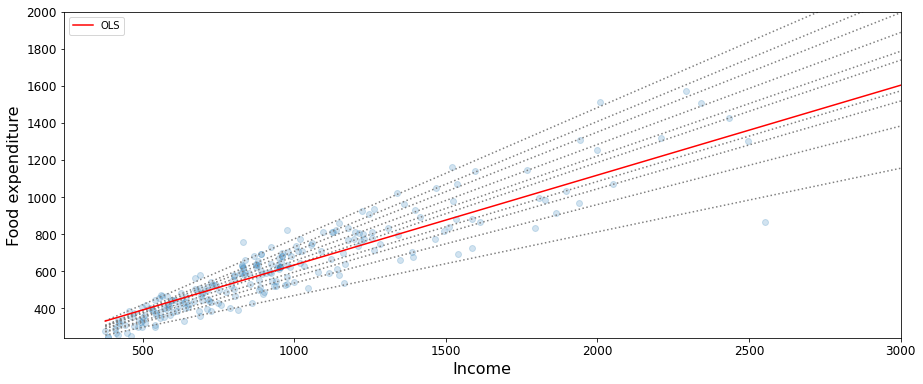

In [14]:
x = np.arange(data.income.min(), data.income.max(), 50)
get_y = lambda a, b: a + b * x

fig, ax = plt.subplots(figsize=(15, 6))

for i in range(models.shape[0]):
    y = get_y(models.a[i], models.b[i])
    ax.plot(x, y, linestyle='dotted', color='grey')

y = get_y(ols['a'], ols['b'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(data.income, data.foodexp, alpha=.2)
ax.set_xlim((240, 3000))
ax.set_ylim((240, 2000))
legend = ax.legend()
ax.set_xlabel('Income', fontsize=16)
ax.set_ylabel('Food expenditure', fontsize=16);

**The least squares estimates fit low income observations quite poorly (i.e. the OLS line passes over most low income households.**

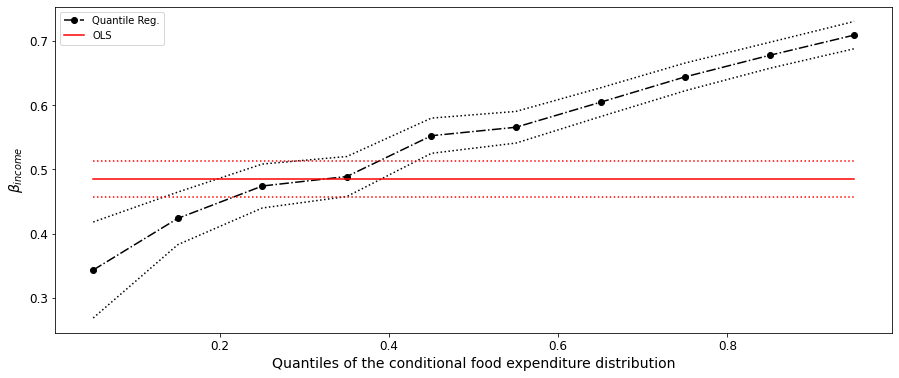

In [18]:
fig, ax = plt.subplots(figsize=(15, 6))

n = models.shape[0]
p1 = plt.plot(models.q, models.b, 'o', color='black', linestyle ='-.', label='Quantile Reg.')
p2 = plt.plot(models.q, models.ub, linestyle='dotted', color='black')
p3 = plt.plot(models.q, models.lb, linestyle='dotted', color='black')
p4 = plt.plot(models.q, [ols['b']] * n, color='red', label='OLS')
p5 = plt.plot(models.q, [ols['lb']] * n, linestyle='dotted', color='red')
p6 = plt.plot(models.q, [ols['ub']] * n, linestyle='dotted', color='red')
plt.ylabel(r'$\beta_{income}$')
plt.xlabel('Quantiles of the conditional food expenditure distribution')
plt.legend()
plt.show()

**The plots shows that the effect of income on food expenditure may not be constant across the distribution.**

Can you now build up a quantile regression model for our Boston house data?